<a href="https://colab.research.google.com/github/Rachael-Osoro/phase_3_project/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# metric module
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, \
classification_report, confusion_matrix, plot_confusion_matrix, \
 roc_curve, roc_auc_score, plot_roc_curve, auc
from imblearn.over_sampling import SMOTE 

# Preprocessing

We have a clean dataset, all variables are numerical, I'll prepare the data for machine learning models. Target variables are categorical in binary format, therefore, classification models and ensemble methods are best suited for this data.

In [6]:
pd.set_option('display.max_columns', 40)

# display features of the dataset
df = pd.read_csv('/content/gdrive/MyDrive/phase_3/H1N1_data/clean_df', index_col=0)
print(df.shape)
df.head()


(26707, 32)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,3.0,1.0,3.0,0.0,2.0,1.0,0.0,1.0,8.0
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,1.0,1.0,0.0,1.0
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,9.0
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,4.0,0.0,3.0,0.0,2.0,1.0,1.0,1.0,5.0
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0


In [7]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region'],
      dtype='object')

In [8]:
to_drop = ['respondent_id', 'doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']


In [9]:
# display target variables
target = pd.read_csv('/content/gdrive/MyDrive/phase_3/H1N1_data/training_set_labels.csv') 
print(target.shape)
target.head()

(26707, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


###Train Test Split
Split dataset into training set for the model to learn and testing set to simulate model performance on unseen data

In [10]:
# Define X and y
# Drop respondent ID, it is an artifact, not useful in our classification

X = df.drop(columns=to_drop, axis=1)
y = target['h1n1_vaccine']

# train_test_split X and y 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    shuffle=True,
                                                    stratify = y,
                                                    random_state=42)

# print size of train and test set
print('X_train size: ', X_train.shape)
print('y_train size: ', y_train.shape)
print('X_test size: ', X_test.shape)
print('y_test size: ', y_test.shape)

X_train size:  (21365, 27)
y_train size:  (21365,)
X_test size:  (5342, 27)
y_test size:  (5342,)


## Baseline Model
Fit a baseline model for reference with subsequent trained models. Logistic Regression model is our baseline model with the default parameters defined in sklearn. Since our data is has varying scale, it is important to normalize the features to a consistent scale of between 0 and 1 to level the playing field for this model.

In [11]:
# using Standard Scaler for normalization
scaler = StandardScaler()
# fit train set
# transform test/eval set

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns=X_train.columns,
                              index=X_train.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                             columns = X_test.columns, 
                             index=X_test.index)              

# instantiate LogisticRegression

baseline_logreg = LogisticRegression(random_state=42)

# fit scaled training set to the model
baseline_model = baseline_logreg.fit(X_train_scaled, y_train)


#### Evaluating performance of baseline model


In [12]:
# predict performance of model on train and test set

train_preds = baseline_model.predict(X_train_scaled)
test_preds = baseline_model.predict(X_test_scaled)

In [13]:
# accuracy and f1 scores of test and train set

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)
train_prec = recall_score(y_train, train_preds)
test_prec = recall_score(y_test, test_preds)

In [14]:
print('Train Accuracy:', train_acc)
print('Test Accuracy:', test_acc)
print('-------------------------------')
print('Precison score for training set: ', train_prec)
print('Precision score for testing set: ', test_prec)


Train Accuracy: 0.834963725719635
Test Accuracy: 0.832459752901535
-------------------------------
Precison score for training set:  0.41154439303811413
Precision score for testing set:  0.40969162995594716


In [15]:
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train_scaled, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.38958510288118486

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


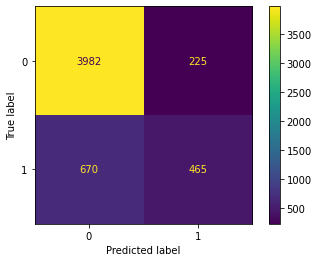

In [16]:
plot_confusion_matrix(baseline_logreg, X_test_scaled, y_test)

In [17]:
# calculate probabilities of each datapoint
y_score = baseline_model.decision_function(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.8153001762323964


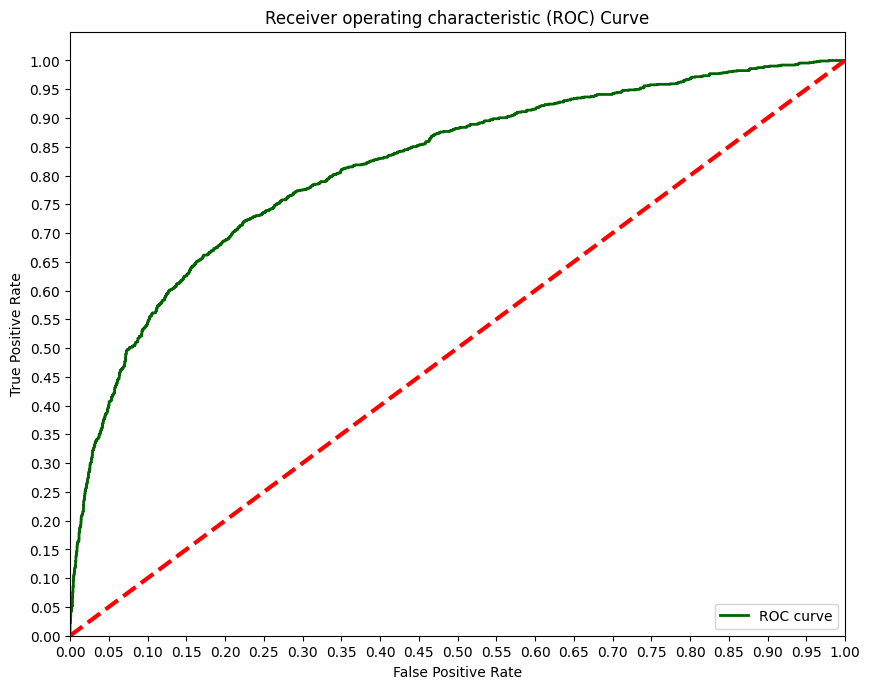

In [18]:
fig, ax = plt.subplots(figsize=(10,8), dpi=100)

ax.plot(fpr, tpr, color='darkgreen',
         lw=2, label='ROC curve')
ax.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.show()

This baseline model has 83% accuracy which is a bit misleading because of class imbalance in our target variable, therefore, a larger percentage of the majority class will be predicted compared to the minority class. This accuracy score means the model will correctly assign unvaccinated and vaccinated people 83% of the time. This is pretty good, but we will work to improve the accuracy in subsequent models. A log loss 0f 0.39 is high. Remember there is class imbalance in the target variable. Let's do some hyperparameter tuning.

### Logistic Regression Hyperparameter Tuning
Review the baseline model hyperparameters.

In [19]:
baseline_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [20]:
# similar algorithm as baseline model but with class_weight = balanced
# 
second_logreg = LogisticRegression(class_weight= 'balanced', random_state=42)
model_2 = second_logreg.fit(X_train_scaled, y_train)
train_preds_2 = model_2.predict(X_train_scaled)
test_preds_2 = model_2.predict(X_test_scaled)

In [21]:
# target variable predictions
train2_acc = accuracy_score(y_train, train_preds_2)
test2_acc = accuracy_score(y_test, test_preds_2)

print('Baseline Model Train Accuracy:', train_acc)
print('Baseline Model Test Accuracy:', test_acc)
print('\n')
print('Second Model Train Accuracy:', train2_acc)
print('Second Model Test Accuracy:', test2_acc)


Baseline Model Train Accuracy: 0.834963725719635
Baseline Model Test Accuracy: 0.832459752901535


Second Model Train Accuracy: 0.7764100163819331
Second Model Test Accuracy: 0.7652564582553351


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


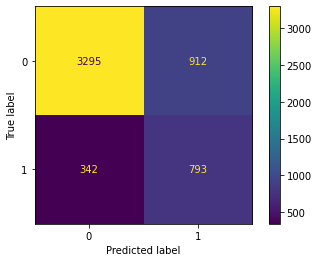

In [22]:
plot_confusion_matrix(second_logreg, X_test_scaled, y_test)

The second logistic model is performing significantly worse than our baseline model. The accuracy score has gone down in addition too many false postives, the one thing am trying to reduce. On the positive side, true positives have increased.

In [23]:
model_2.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### SMOTE
Hyperparameter tuning does not seem to improve model accuracy by much. In the next model, we will use SMOTE to oversample the minority class. In this dataset, minority class are those not vaccinated (class 0).
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.
Below is the proportion of class imbalance.

In [24]:
# a look at our class imbalance problem
y_train.value_counts(normalize=True)

0    0.78755
1    0.21245
Name: h1n1_vaccine, dtype: float64

In [25]:
# import Counter from collections
from collections import Counter

# Instantiate SMOTE as oversample
oversample = SMOTE(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X_train_scaled, y_train)
pd.DataFrame(data=X_resampled, columns=X_train.columns)

print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 16826, 1: 16826})


In [26]:
third_logreg = LogisticRegression(random_state=42, class_weight={1: 0.29},
                                  C=1e5, max_iter=1000)
model_log = third_logreg.fit(X_resampled, y_resampled)
train3_preds = model_log.predict(X_train_scaled)
test3_preds = model_log.predict(X_test_scaled)

print('Baseline Model Train Accuracy:', train_acc)
print('Baseline Model Test Accuracy:', test_acc)
print('\n')
print('Second Model Train Accuracy:', train2_acc)
print('Second Model Test Accuracy:', test2_acc)
print('\n')
print('Third Model Train Accuracy with SMOTE:', accuracy_score(y_train, train3_preds))
print('Third Model Test Accuracy with SMOTE:', accuracy_score(y_test, test3_preds))

Baseline Model Train Accuracy: 0.834963725719635
Baseline Model Test Accuracy: 0.832459752901535


Second Model Train Accuracy: 0.7764100163819331
Second Model Test Accuracy: 0.7652564582553351


Third Model Train Accuracy with SMOTE: 0.8350105312426866
Third Model Test Accuracy with SMOTE: 0.8347061025833021


In [27]:
y3_score = model_log.decision_function(X_test_scaled)

fpr3, tpr3, thresholds3 = roc_curve(y_test, y3_score)
    
print('AUC for {}: {}'.format, auc(fpr3, tpr3))


<built-in method format of str object at 0x7f836f264670> 0.8137841378277656


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


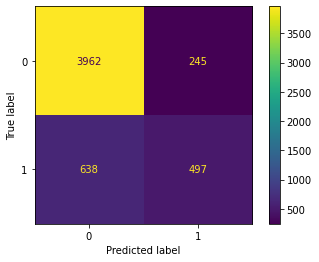

In [28]:
plot_confusion_matrix(model_log, X_test_scaled, y_test)

Very minimal changes from the baseline model. The model developed after SMOTE has an accuracy of about 83.5%. 

## Decision Tree Classifier
Decision trees are used to classify by partitioning the sample space as efficiently as possible into sets with similar data points until you get to (or close to) a homogenous set and can reasonably predict the value for new data points.
Decision trees do no require any feature transformation. 

In [29]:
tree = DecisionTreeClassifier(random_state=42)
model_tree = tree.fit(X_train, y_train)

print('Tree baseline accuracy:', accuracy_score(y_test, model_tree.predict(X_test)))


Tree baseline accuracy: 0.7431673530512917


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


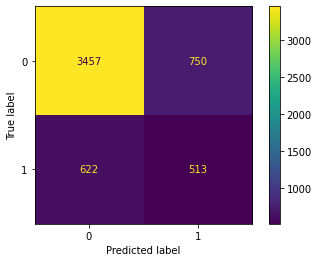

In [30]:
plot_confusion_matrix(tree, X_test, y_test)

In [31]:
train_accuracy = accuracy_score(y_train, model_tree.predict(X_train))
test_accuracy = accuracy_score(y_test, model_tree.predict(X_test))

print('Train Accuracy of baseline tree model:', train_accuracy)
print('Test Accuracy of baseline tree model:', test_accuracy)

Train Accuracy of baseline tree model: 0.9999531944769483
Test Accuracy of baseline tree model: 0.7431673530512917


The baseline decision tree model is performing waay better on the training set than test set. Clearly, poor generalization. Hyperparameter tuning to reduce overfitting.

In [32]:
 # identify the max_depth for baseline decision tree classifier
model_tree.tree_.max_depth

# reduce max_depth to a number less than 34

30

In [33]:
for depth in range(1, 12):
  model = DecisionTreeClassifier(max_depth=depth, random_state=42)
  model.fit(X_train, y_train)
  print('training accuracy for max_depth {}:'.format(depth), model.score(X_train, y_train))
  print('evaluation accuracy for max_depth {}:'.format(depth), model.score(X_test, y_test))
  print('----------------------------------------------')

training accuracy for max_depth 1: 0.7987362508776036
evaluation accuracy for max_depth 1: 0.8083114938225384
----------------------------------------------
training accuracy for max_depth 2: 0.8205008190966534
evaluation accuracy for max_depth 2: 0.819543242231374
----------------------------------------------
training accuracy for max_depth 3: 0.8273812309852563
evaluation accuracy for max_depth 3: 0.8253463122426058
----------------------------------------------
training accuracy for max_depth 4: 0.8322490053826351
evaluation accuracy for max_depth 4: 0.8262822912766754
----------------------------------------------
training accuracy for max_depth 5: 0.8330915047975661
evaluation accuracy for max_depth 5: 0.8253463122426058
----------------------------------------------
training accuracy for max_depth 6: 0.8378188626257899
evaluation accuracy for max_depth 6: 0.8240359415949082
----------------------------------------------
training accuracy for max_depth 7: 0.8429206646384273
evalu

The accuracy scores are not the best but the sweet spot where we get rid of overfitting is at a maximum depth of 4. That will go into the next model

In [34]:
# criterion entropy
# max_depth
tree2 = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              min_samples_leaf=1, 
                              random_state=42)
second_tree = tree2.fit(X_train, y_train)


In [35]:
train_accuracy1 = accuracy_score(y_train, tree2.predict(X_train))
test_accuracy1 = accuracy_score(y_test, tree2.predict(X_test))

print('Train Accuracy of baseline tree model:', train_accuracy)
print('Test Accuracy of baseline tree model:', test_accuracy)
print('--------------------------------------------------')
print('Train Accuracy of second tree model:', train_accuracy1)
print('Test Accuracy of second tree model:', test_accuracy1)

Train Accuracy of baseline tree model: 0.9999531944769483
Test Accuracy of baseline tree model: 0.7431673530512917
--------------------------------------------------
Train Accuracy of second tree model: 0.8322490053826351
Test Accuracy of second tree model: 0.8262822912766754


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


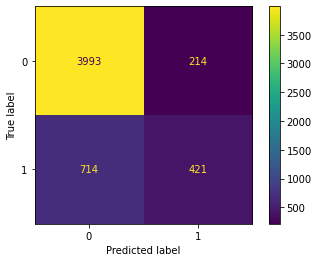

In [36]:
plot_confusion_matrix(tree2, X_test, y_test)

### Gridsearchcv

In [37]:
tree2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [38]:
from sklearn.model_selection import GridSearchCV
tree3 = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'log2', 'sqrt'],
    'max_depth': list(range(3,8)),
    'min_samples_split': [0.5, 2, 3],
    'max_leaf_nodes': list(range(2,51))
}

gs_tree = GridSearchCV(tree3, param_grid, cv=3)
third_tree = gs_tree.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


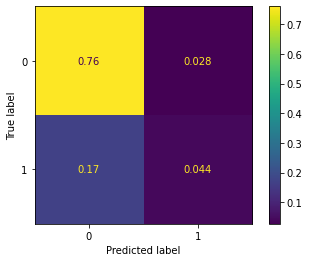

In [39]:
plot_confusion_matrix(gs_tree, X_test, y_test, normalize='all')

In [40]:
third_tree

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [0.5, 2, 3]})

In [41]:
gs_tree.best_params_


{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': 45,
 'min_samples_split': 2}

In [42]:
# use best parameters given by gridSearch

clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=6, 
                              min_samples_leaf=2, max_leaf_nodes = 45, 
                              random_state=42)
tree4 = clf3.fit(X_train, y_train)


train_accuracy2 = accuracy_score(y_train, tree4.predict(X_train))
test_accuracy2 = accuracy_score(y_test, tree4.predict(X_test))


print('Train Accuracy of baseline tree model:', train_accuracy)
print('Test Accuracy of baseline tree model:', test_accuracy)
print('--------------------------------------------------')
print('Train Accuracy of second tree model:', train_accuracy1)
print('Test Accuracy of second tree model:', test_accuracy1)
print('----------------------------------------------------')
print('Train Accuracy of  third tree model:', train_accuracy2)
print('Test Accuracy of third tree model:', test_accuracy2)

Train Accuracy of baseline tree model: 0.9999531944769483
Test Accuracy of baseline tree model: 0.7431673530512917
--------------------------------------------------
Train Accuracy of second tree model: 0.8322490053826351
Test Accuracy of second tree model: 0.8262822912766754
----------------------------------------------------
Train Accuracy of  third tree model: 0.8360870582728762
Test Accuracy of third tree model: 0.8240359415949082


Baseline decision tree classifier had the best the decision tree accuracy of the three. despite a gridsearchCV

## Random Forest Classifer
Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.
Random forests is highly accurate and robust.

It is resilient to noise hence not prone to overfitting.

You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

However, it is computationally complex, slow to implement and utilizes a larger memory foot print.

We'll begin by fitting an initial random forest classifier, so that we have something to compare our ensemble methods to.
### First forest iteration

In [43]:

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
print('Regular Random Forest train accuracy:', accuracy_score(y_train, forest.predict(X_train)))
print('Regular Random Forest evaluation accuracy:', accuracy_score(y_test, forest.predict(X_test)))

Regular Random Forest train accuracy: 0.9999531944769483
Regular Random Forest evaluation accuracy: 0.830026207412954


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


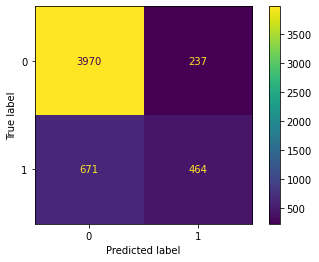

In [45]:
plot_confusion_matrix(forest, X_test, y_test)

This model is seems to be overfitting. The accuracy score on training set is 99.9% while evaluation has 83% accuracy. Generalization was not achieved well here. Tuning hyperparameters to see performance of subsequent models

#### Hyperparameter tuning for Random Forests
##### Second forest iteration

In [46]:
# hyperparameter tuning
forest_1 = RandomForestClassifier(random_state=42,
                                  max_depth = 6,
                                  n_estimators=1000,
                                  criterion='gini',
                                  max_features='sqrt')
# fit second random forest
forest_1.fit(X_train, y_train)

#print accuracy
print('Second Random Forest train accuracy:', accuracy_score(y_train, forest_1.predict(X_train)))
print('Second Random Forest evaluation accuracy:', accuracy_score(y_test, forest_1.predict(X_test)))

Second Random Forest train accuracy: 0.8350573367657383
Second Random Forest evaluation accuracy: 0.8307749906402097


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


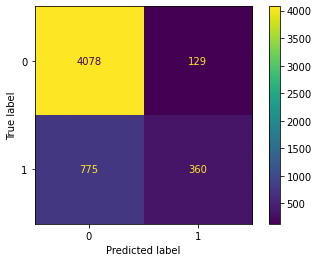

In [47]:
plot_confusion_matrix(forest_1, X_test, y_test)

The second forest is doing better than the initial in that, it has reduced overfitting, and an ever so slightly increase in accuracy.
Let's find the feature importance of the second random forest, it may inform our subsequent forests.

In [48]:
feature_imp = pd.Series(forest_1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

doctor_recc_h1n1               0.383800
opinion_h1n1_risk              0.218055
opinion_h1n1_vacc_effective    0.190724
health_worker                  0.060527
h1n1_knowledge                 0.022556
h1n1_concern                   0.016894
opinion_h1n1_sick_from_vacc    0.013693
age_group                      0.010385
chronic_med_condition          0.010262
race                           0.010252
education                      0.007305
hhs_geo_region                 0.006111
employment_status              0.005438
household_children             0.004803
behavioral_face_mask           0.004700
child_under_6_months           0.004494
behavioral_wash_hands          0.004062
rent_or_own                    0.003775
household_adults               0.003565
marital_status                 0.003480
income_poverty                 0.003307
behavioral_touch_face          0.002508
behavioral_large_gatherings    0.002301
behavioral_outside_home        0.001851
behavioral_antiviral_meds      0.001815


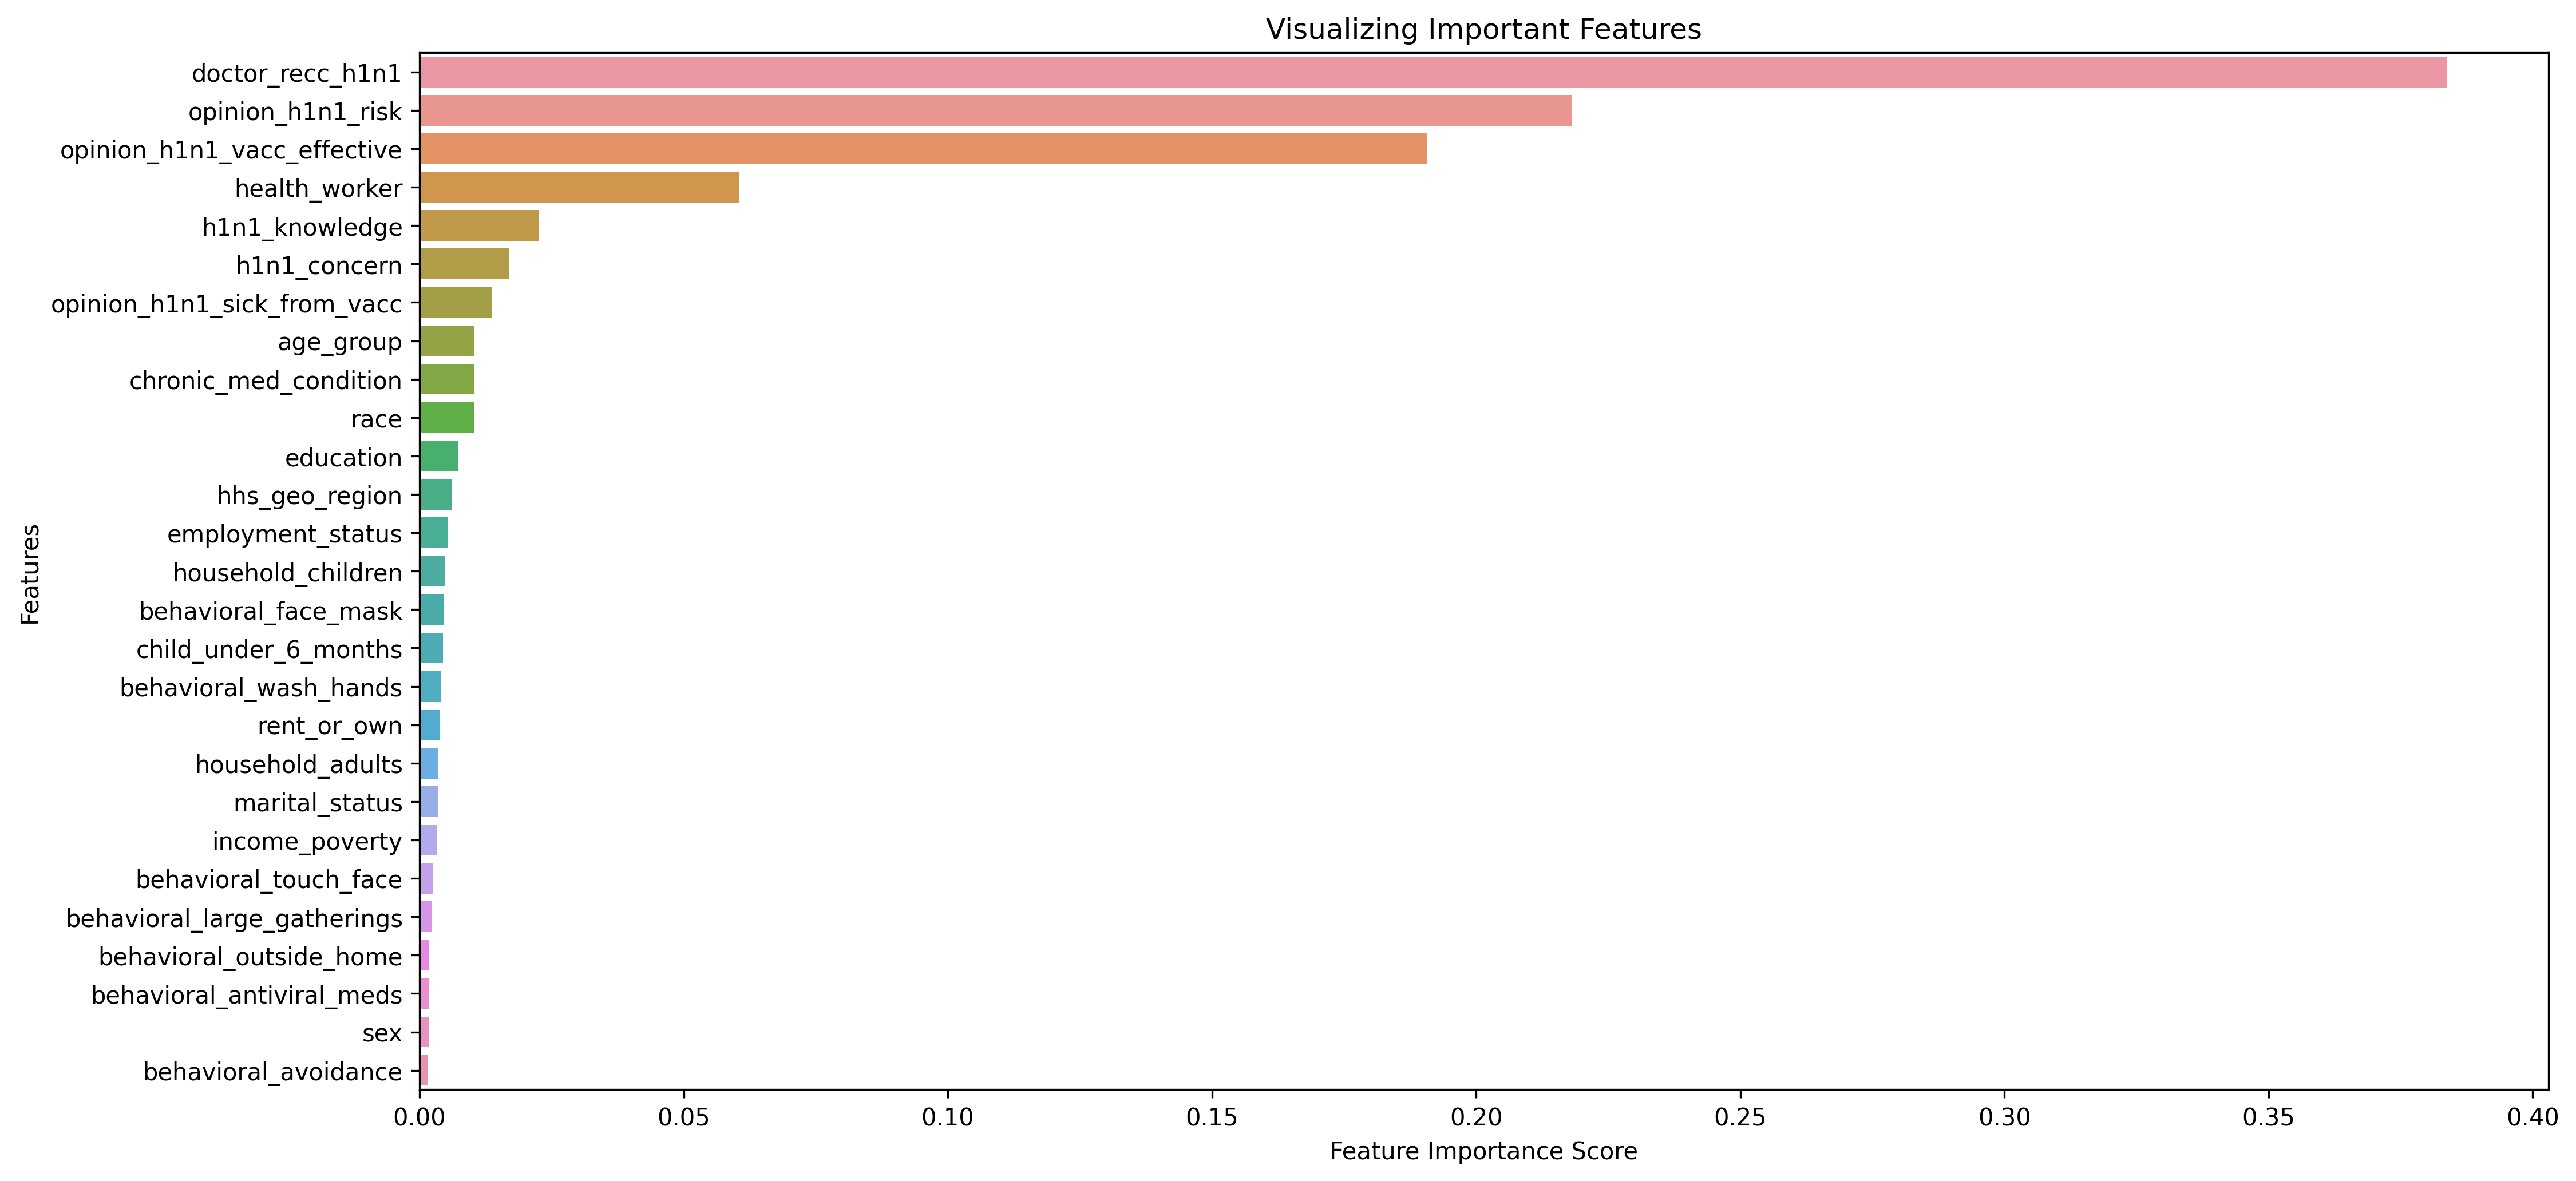

In [49]:
# Creating a bar plot
fig, ax = plt.subplots(figsize=(16,8), dpi=300)

sns.barplot(x=feature_imp, y=feature_imp.index, ax=ax)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [50]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(forest_1).fit(X_train, y_train)

selector.threshold_


0.037037037037037035

doctor's recomendation is the only feature that surpassed important feature threshold. since we can't use just a single feature for training, let's drop features with less than 0.003 mean importance 

In [51]:
# select features above 0.003
non_imp = feature_imp[feature_imp < 0.003]
non_imp

behavioral_touch_face          0.002508
behavioral_large_gatherings    0.002301
behavioral_outside_home        0.001851
behavioral_antiviral_meds      0.001815
sex                            0.001735
behavioral_avoidance           0.001602
dtype: float64

In [52]:
# create a new train set and test set with important features
drop_from_set = ['sex', 'behavioral_outside_home', 'behavioral_avoidance',
                 'behavioral_touch_face', 'behavioral_large_gatherings',
                 'behavioral_antiviral_meds']
# new train and new_test
X_train_new = X_train.drop(columns = drop_from_set, axis=1)
X_test_new = X_test.drop(columns = drop_from_set, axis=1)

#### Third Random forests
Here we fit the new training set

In [102]:
forest_2 = RandomForestClassifier(random_state=42,
                                  max_depth = 7,
                                  n_estimators=1000,
                                  criterion='gini',
                                  max_features='sqrt')
forest_2.fit(X_train_new, y_train)

print('Regular Random Forest train accuracy:', accuracy_score(y_train, forest.predict(X_train)))
print('Regular Random Forest evaluation accuracy:', accuracy_score(y_test, forest.predict(X_test)))
print('---------------------------------------------------------------')
print('Second Random Forest train accuracy:', accuracy_score(y_train, forest_1.predict(X_train)))
print('Second Random Forest evaluation accuracy:', accuracy_score(y_test, forest_1.predict(X_test)))
print('---------------------------------------------------------------------')
print('Third Random Forest train accuracy:', accuracy_score(y_train, forest_2.predict(X_train_new)))
print('Third Random Forest evaluation accuracy:', accuracy_score(y_test, forest_2.predict(X_test_new)))

Regular Random Forest train accuracy: 0.9999531944769483
Regular Random Forest evaluation accuracy: 0.830026207412954
---------------------------------------------------------------
Second Random Forest train accuracy: 0.8350573367657383
Second Random Forest evaluation accuracy: 0.8307749906402097
---------------------------------------------------------------------
Third Random Forest train accuracy: 0.841142054762462
Third Random Forest evaluation accuracy: 0.8328341445151629


Third random forest performed better than the first two random forests but slightly.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


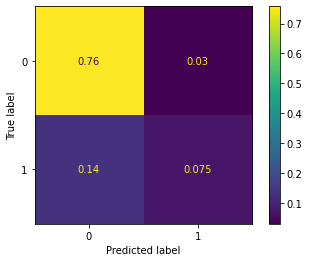

In [54]:
plot_confusion_matrix(forest_2, X_test_new, y_test, normalize='all')

The model has 76% true negatives, 14% false negatives, 7.5% true positives and 3% false positives.

Welp, that slightly improved performance of random forests our model, albeit slightly. Using GridsearchCV to find the best parameters:

## Gradient boosting classifier


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)
gb = clf.fit(X_train, y_train)

In [57]:
accuracy_score(y_test, gb.predict(X_test))

0.8333957319356047

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


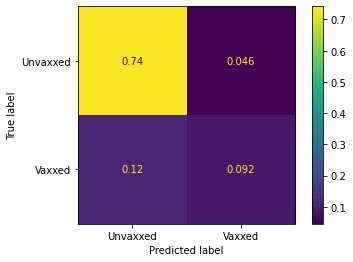

In [58]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Unvaxxed', 'Vaxxed'], normalize='all')

74% True positives, 12% False negatives, 9.2% True positive, 4.6% False positives

### XGBoost: First Iteration

In [100]:
from datetime import datetime as dt

start = dt.now()

from xgboost import XGBClassifier
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit XGBClassifier
xgb.fit(X_train, y_train)

running_secs = (dt.now() - start).seconds

# Predict on training and test sets
training_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Time in seconds This model runs for: ', running_secs )

Training Accuracy: 84.22%
Validation accuracy: 83.66%
Time in seconds This model runs for:  2


### XGBoost Second Iter

In [61]:
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [91]:
xgb2 = XGBClassifier()
xgb2.fit(X_train_new, y_train)
train_preds2 = xgb2.predict(X_train_new)
test_preds2 = xgb2.predict(X_test_new)

training_accuracy2 = accuracy_score(y_train, train_preds2)
test_accuracy2 = accuracy_score(y_test, test_preds2)
print('XGB with SMOTE: {:.4%}'.format(test_accuracy2))

XGB with SMOTE: 83.4893%


#### Third XGBoost Iteration

In [62]:
xgb3 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=2000,
 max_depth=4,
 min_child_weight=8,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.6,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb3.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.6, learning_rate=0.01, max_depth=4,
              min_child_weight=8, n_estimators=2000, nthread=4, reg_alpha=0.005,
              seed=27, subsample=0.6)

In [63]:
preds = xgb3.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, preds)

0.8362036690378135

In [69]:
precision_score(y_test, preds)

0.6706036745406824

In [90]:
print('First  XGBoost Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('First XGBoost Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('----------------------------------------------')
print('Second XGBoost with SMOTE Accuracy: {:.4%}'.format(test_accuracy2))
print('-------------------------------------')
print('SThird XGBoost accuracy: {:.4}%'.format(accuracy_score(y_test, preds)*100))

First  XGBoost Training Accuracy: 84.22%
First XGBoost Validation accuracy: 83.66%
----------------------------------------------
Second XGBoost with SMOTE Accuracy: 83.4893%
-------------------------------------
SThird XGBoost accuracy: 83.62%


Slight reduction in accuracy of the second and third XCGBoost Model.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


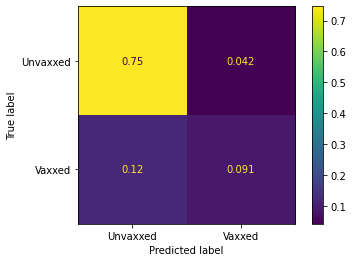

In [72]:
# confusion matrix for the final model
plot_confusion_matrix(xgb, X_test, y_test, display_labels=['Unvaxxed', 'Vaxxed'], normalize='all')


In [64]:
# feature importance of XGBoost Classifier

feature_impx = pd.Series(xgb.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_impx

doctor_recc_h1n1               0.411348
opinion_h1n1_risk              0.118471
opinion_h1n1_vacc_effective    0.085129
health_worker                  0.078689
opinion_h1n1_sick_from_vacc    0.025444
h1n1_knowledge                 0.024317
age_group                      0.023416
race                           0.019418
h1n1_concern                   0.017459
education                      0.017315
behavioral_large_gatherings    0.015845
child_under_6_months           0.015085
behavioral_antiviral_meds      0.013035
behavioral_face_mask           0.012432
chronic_med_condition          0.012188
marital_status                 0.011916
behavioral_outside_home        0.011746
sex                            0.011549
household_children             0.010973
rent_or_own                    0.010625
hhs_geo_region                 0.010582
household_adults               0.009281
employment_status              0.008681
behavioral_wash_hands          0.007879
income_poverty                 0.007346


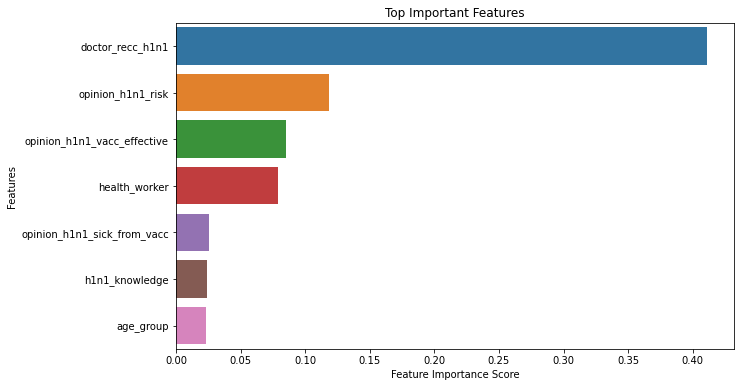

In [111]:
# Creating a bar plot
fig, ax = plt.subplots(figsize=(10,6))
x=feature_impx[feature_impx >=0.02]
sns.barplot(x=x, y=x.index, ax=ax)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Top Important Features")

plt.show()

# Final Model
Random forest with the following features dropped after calculating feature importance:
```behavioral_touch_face```          0.002508
```behavioral_large_gatherings```    0.002301
```behavioral_outside_home```       0.001851
```behavioral_antiviral_meds```     0.001815
```sex````                            0.001735
````behavioral_avoidance````         0.001602


In [113]:
final_model = RandomForestClassifier(random_state=42,
                                  max_depth = 7,
                                  n_estimators=1000,
                                  criterion='gini',
                                  max_features='sqrt')
final_model.fit(X_train_new, y_train)


print('Final Model Random Forest train accuracy:', accuracy_score(y_train, forest_2.predict(X_train_new)))
print('Final Model Random Forest evaluation accuracy:', accuracy_score(y_test, forest_2.predict(X_test_new)))

Final Model Random Forest train accuracy: 0.841142054762462
Final Model Random Forest evaluation accuracy: 0.8328341445151629


In [114]:
from sklearn.pipeline import Pipeline

start = dt.now()       #time model starts running
# building a pipeline
pipe = Pipeline([('tree', RandomForestClassifier(random_state=42,
                                                 max_depth=7,
                                                 n_estimators = 1000,
                                                 criterion = 'gini',
                                                 max_features='sqrt')
)])

#fitting training set
pipe.fit(X_train_new, y_train)

running_secs = (dt.now() - start).seconds #end time
print(running_secs)

13


In [104]:
# model accuracy

pipe.score(X_test_new, y_test)

0.8328341445151629

In [109]:
# precision score
test_preds = pipe.predict(X_test_new)
precision_score(y_test, test_preds)

0.7160714285714286

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


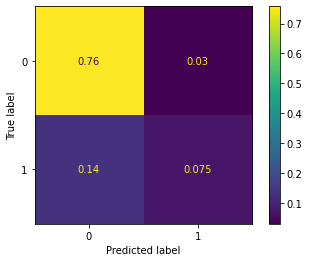

In [105]:
plot_confusion_matrix(pipe, X_test_new, y_test, normalize='all')

### Interpretation of Final Model
83.3% accuracy means the model assigns respondents to the right class 83.3% of the time. A precision score of 71.6% tells us that the model predicts vaccinated as class 1, 71.6% percent of the time.

The model correctly assigns unvaccinated to 76% of the respondents. whereas it assigns those vaccinated 7.5%.

The false negatives are 14% i.e respondents who are vaccinated have a chance of being wrongly classified as class 0. Respondents have a 3% chance of being classified as vaccinated when in reality they are not vaccinated( false positive).
This model significantly reduces false positives, which fits into our goal of capturing as many unvaccinated people in order to strategize.

P.S the peipeline runs for 13 seconds 

### Recommendations
1.) Model is able to predict of unvaccinated people. The CDC can reach them through text, email etc to nudge the need for vaccination.

2.) Encourage doctors to recommend vaccinations to the general public.

3.) Dispell misinformation about the vaccine, by providing adequate information about vaccine effectiveness.

4.) Educating the public on risk factors of the H1N1, it's spread and preventive measures so that the public has factual reliable information.

 

